In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from BM import BoltzmannMachine

In [3]:
# The original data file has dimension 160 × 283041, which are 297 repeated experiments,
# each of which has 953 time points. Use only one of these repeats for training the BM, 
# ie. your data file for training has dimension 10 × 953. 
np.random.seed(0)
rand_neurons = np.random.randint(160, size=10)
sal_data = np.loadtxt('data/bint.txt')[rand_neurons, :953]
sal_data[np.where(sal_data == 0)] = -1 # change 0 to -1

In [6]:
# set params
eta = .001 # learning rate
epsilon = 1e-4/2 # convergence criterion
num_iter = 1000 # number of MH steps

# generate random data set with 10-20 spins
n_spins = sal_data.shape[0]
w_init = np.ones((n_spins, n_spins))
w = w_init = w_init - np.diag(w_init)

theta = theta_init = np.random.randn(n_spins)

bm = BoltzmannMachine(sal_data, w, theta, eta, epsilon, num_iter)
bm.plot_LL('Salamander Independent', 'exact', train_weights=False)

max param change:0.0018993244171645518
max param change:0.001899122650091553
max param change:0.0018989201787537127
max param change:0.0018987170010043362
max param change:0.0018985131146924475
max param change:0.0018983085176628009
max param change:0.0018981032077558893
max param change:0.0018978971828079525
max param change:0.0018976904406509875
max param change:0.001897482979112757
max param change:0.001897274796016799
max param change:0.0018970658891824359
max param change:0.0018968562564247865
max param change:0.0018966458955547729
max param change:0.0018964348043791347
max param change:0.0018962229807004344
max param change:0.0018960104223170718
max param change:0.0018957971270232936
max param change:0.0018955830926092037
max param change:0.0018953683168607752
max param change:0.0018951527975598608
max param change:0.001894936532484205
max param change:0.0018947195194074548
max param change:0.0018945017560991725
max param change:0.0018942832403248463
max param change:0.0018940639

In [93]:
# set params
eta = .01 # learning rate
epsilon = 1e-13 # convergence criterion
num_iter = 1000 # number of MH steps

# generate random data set with 10-20 spins
n_spins = sal_data.shape[0]
w_init = np.ones((n_spins, n_spins))
w = w_init = w_init - np.diag(w_init)

theta = theta_init = np.random.randn(n_spins)

coupled_bm = BoltzmannMachine(sal_data, w, theta, eta, epsilon, num_iter)
coupled_bm.plot_LL('Salamander Coupled', 'exact', train_weights=True)

max param change:0.018136336698091834
max param change:0.01800986047693853
max param change:0.017873997475177344
max param change:0.017727423304034037
max param change:0.01756839730406399
max param change:0.017394649225610962
max param change:0.017203246343420582
max param change:0.016990447031732483
max param change:0.016751557811224695
max param change:0.016480829846016842
max param change:0.01617145963334187
max param change:0.015815794811656878
max param change:0.015405876802040997
max param change:0.014934446873928184
max param change:0.014396453446548331
max param change:0.013790886684024955
max param change:0.013122462726434572
max param change:0.012402447379067545
max param change:0.011647998744882327
max param change:0.01087993831845911
max param change:0.010119588022942142
max param change:0.009385739726390195
max param change:0.008692653703514432
max param change:0.008049397042070248
max param change:0.007460273984217256
max param change:0.006925850650231492
max param change

KeyboardInterrupt: 

(5e-06, 0.2)

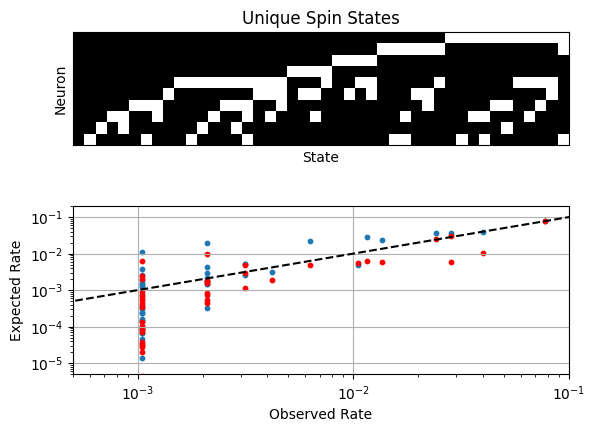

In [87]:
# Get unqie spin states
unique_states, counts = np.unique(sal_data, axis=1, return_counts=True) 
observed_rate = counts / sal_data.shape[1]
predicted_rate = bm.boltzmann_gibbs_normalized(unique_states)
coupled_predicted_rate = coupled_bm.boltzmann_gibbs_normalized(unique_states)
assert np.isclose(observed_rate.sum(), 1)
# Remove all -1 spins
observed_rate = observed_rate[1:]
predicted_rate = predicted_rate[1:]
coupled_predicted_rate = coupled_predicted_rate[1:] 


fig, axes = plt.subplots(2)
axes[0].imshow(unique_states, cmap='gray')
axes[0].set_title('Unique Spin States')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Neuron')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].scatter(observed_rate, predicted_rate, 
                s=10, label='Independent Spin Model')
axes[1].scatter(observed_rate, coupled_predicted_rate, 
                s=10, color='red', label='Coupled Spin Model')
# Labels
axes[1].set_xlabel('Observed Rate')
axes[1].set_ylabel('Expected Rate')
# Set log scaling
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].plot([1e-4, 1e-3, 1e-2, 10], [1e-4, 1e-3, 1e-2, 10], 
             color='black', linestyle='--', label='Equality')

# Aesthetic
axes[1].grid(True)
axes[1].set_xlim(1e-3/2, 1e-1)
axes[1].set_ylim(1e-5/2, 1e-1*2)